# Tiramisu Inference

In this demo, we show an inference step on the Tiramisu model, pretrained on radioastronomical images, with the objective to perform semantic segmentation, by predicting both the mask and the category of the objects in each image. 

At the end, image and predicted masks will be displayed

In [1]:
from PIL import Image
import torch
import numpy as np
import torchvision.transforms as T
from models import tiramisu
import utils.training as train_utils
from matplotlib.pyplot import imshow

#### Setting up constants

In [2]:
Background = [0,0,0]
Galaxy = [237,237,12] # Yellow
Sidelobe = [32,207,227] # Light Blue
Source = [250,7,7] # Red

label_colours = np.array([Background, Sidelobe, Source, Galaxy])

classes = ['Background', 'Sidelobe', 'Source', 'Galaxy']

In [3]:
def get_mask(pred, alpha=255):
    temp = pred.numpy()
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    
    for l in range(0,4):
        r[temp==l]=label_colours[l,0]
        g[temp==l]=label_colours[l,1]
        b[temp==l]=label_colours[l,2]

    rgba = np.zeros((temp.shape[0], temp.shape[1], 3), dtype=np.uint8)
    rgba[:,:,0] = r
    rgba[:,:,1] = g
    rgba[:,:,2] = b

    return rgba


Select the image for which you want to predict the output, by assigning the path of the image to the variable `img_path `

In [4]:
img_path = 'sample_input/galaxy1.png'

In [6]:
mean = [0.28535324, 0.28535324, 0.28535324]
std = [0.28536762, 0.28536762, 0.28536762]
normalize = T.Normalize(mean=mean, std=std)

orig_img = Image.open(img_path)
transform=T.Compose([
		T.Resize([132, 132]),
		T.ToTensor(),
		normalize
	])

img = transform(orig_img)

model = tiramisu.FCDenseNet67(n_classes=4).cpu()
model.eval()
train_utils.load_weights(model, 'weights/latest.th', device="cpu")
with torch.no_grad():
	out = model(img.unsqueeze(0))

pred = train_utils.get_predictions(out)
annotated = get_mask(pred[0], 127)
orig_arr = np.array(orig_img)
mask = annotated != 0
orig_arr[mask] = annotated[mask]

loading weights 'weights/latest.th'
loaded weights (lastEpoch 278, loss 0.02135423600481337, error 0.9289988536899313)


/home/rensortino/miniconda3/envs/detr/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


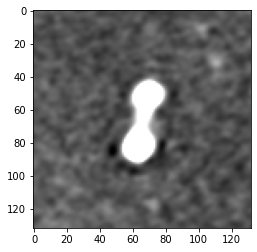

In [7]:
imshow(orig_img)

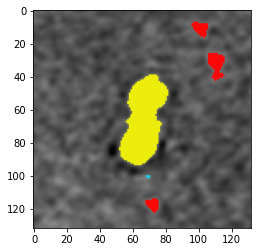

In [8]:
imshow(Image.fromarray(orig_arr))